### Simple BatchGenerator for Binary Classification



In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np


#### Load Data


In [13]:
dataset_path = "../dataset/cat_dog"
train_dataset = os.path.join(dataset_path ,"training_set")
test_dataset = os.path.join(dataset_path, "test_set")
batch_size = 8
input_shape = (160, 160)
classes = ["cats", 'dogs']



#### Building Train/Test Generators


In [14]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=25,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dataset,
        target_size=input_shape,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dataset,
        target_size=input_shape,
        batch_size=batch_size,
        classes=classes,
        class_mode='categorical')

Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


#### Sample visualization


In [15]:
def view_samples(generator):
    iter_generator = iter(generator)
    sample = next(iter_generator)
    images, labels = sample

    ann_images = []
    for image, label in zip(images, labels):
        if label[0]:
            annotation = "Cat"
        else:
            annotation = "Dog"
        img = cv2.putText(image, annotation, (10, 30), 2, 1, (255, 0, 0), 2)
        ann_images.append(img)
    plt.figure(figsize=(30, 10))
    plt.axis('off')
    plt.imshow(np.hstack(ann_images))
    plt.show()


#### Visualize train sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


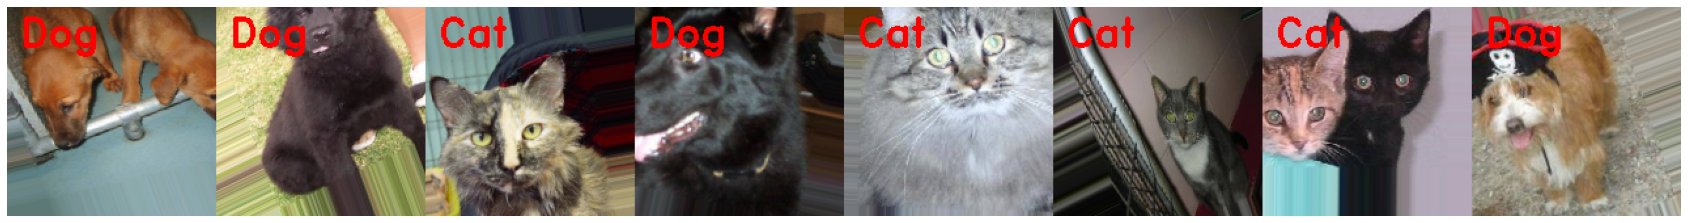

In [16]:
view_samples(train_generator)

#### Visualize test sample

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


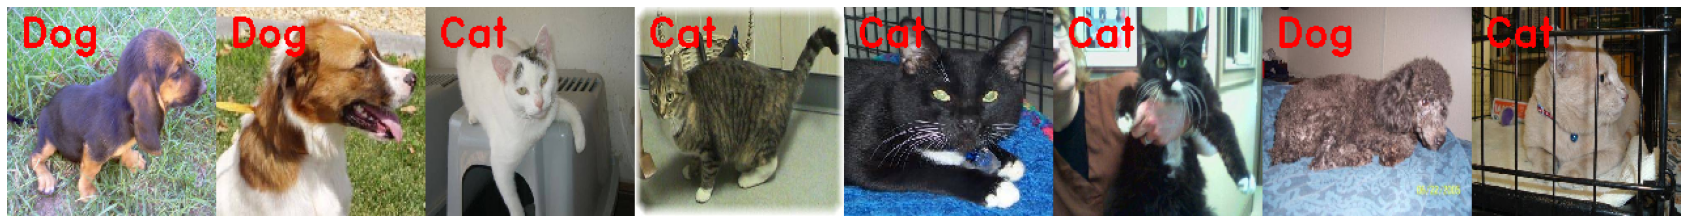

In [17]:
view_samples(test_generator)